In [1]:

import pandas as pd
import pandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

In [2]:
df = pd.read_csv('Resources/US_French_CabSauvi_Bordeauxs.csv')
df

,Unnamed: 0,ID,alcohol,category,country,description,designation,index,price,rating,region,subregion,subsubregion,title,url,varietal,vintage,winery
0,0,NaN,14.0,Red,France,This young wine is so full of fruit. Blackberr...,NaN,5968.0,12.0,86,Bordeaux,Bordeaux,NaN,Château Taussin 2016 Bordeaux,https://www.winemag.com/buying-guide/chateau-t...,Bordeaux-style Red Blend,2016,Château Taussin
1,3,NaN,12.0,Red,France,"Soft, lightweight wine, with gentle tannins an...",NaN,6411.0,14.0,84,Bordeaux,Bordeaux,NaN,Château Dame Jane 2010 Bordeaux,https://www.winemag.com/buying-guide/chateau-d...,Bordeaux-style Red Blend,2010,Château Dame Jane
2,4,NaN,12.5,Red,France,Simply fruity Bordeaux. It has signs of wood a...,Prince Rubis,6412.0,25.0,84,Bordeaux,Bordeaux,NaN,De Mour 2008 Prince Rubis (Bordeaux),https://www.winemag.com/buying-guide/mour-2008...,Bordeaux-style Red Blend,2008,De Mour
3,5,NaN,13.5,Red,France,"Full and rich, this wine has weight and good p...",La Grande Cuvée,5786.0,14.0,88,Bordeaux,Bordeaux,NaN,Dourthe 2016 La Grande Cuvée (Bordeaux),https://www.winemag.com/buying-guide/dourthe-2...,Bordeaux-style Red Blend,2016,Dourthe
4,6,NaN,13.5,Red,France,This concentrated wine with dense tannins is p...,La Freynelle,5787.0,14.0,88,Bordeaux,Bordeaux,NaN,Château la Freynelle 2016 La Freynelle (Borde...,https://www.winemag.com/buying-guide/chateau-l...,Bordeaux-style Red Blend,2016,Château la Freynelle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12077,12216,248205.0,14.2,Red,US,"This is a good Cask 23, but it's by no means a...",Cask 23,NaN,175.0,89,California,Napa,Napa Valley,Stag's Leap Wine Cellars 2003 Cask 23 Cabernet...,https://www.winemag.com/buying-guide/stags-lea...,Cabernet Sauvignon,2003,Stag's Leap Wine Cellars
12078,12217,248238.0,14.5,Red,US,"This is a young, immature wine, but a charming...",Herrick Vineyard,NaN,45.0,90,California,Napa,Yountville,Conn Creek 2003 Herrick Vineyard Cabernet Sauv...,https://www.winemag.com/buying-guide/conn-cree...,Cabernet Sauvignon,2003,Conn Creek
12079,12218,248254.0,14.8,Red,US,Fisher's been on a roll with this wine. While ...,Coach Insignia,NaN,70.0,90,California,Napa,Napa Valley,Fisher 2003 Coach Insignia Cabernet Sauvignon ...,https://www.winemag.com/buying-guide/fisher-20...,Cabernet Sauvignon,2003,Fisher
12080,12219,248264.0,14.8,Red,US,An interesting Cab that's taking the lead in t...,Estate Bottled,NaN,30.0,90,California,Sierra Foothills,Shenandoah Valley (CA),Easton 2003 Estate Bottled Cabernet Sauvignon ...,https://www.winemag.com/buying-guide/easton-20...,Cabernet Sauvignon,2003,Easton


In [3]:
df = df.drop(['Unnamed: 0', 'ID', 'index', 'category', 'description', 'designation', 'subsubregion', 'title', 'url', 'varietal', 'winery'], axis=1)
df.head()


,alcohol,country,price,rating,region,subregion,vintage
0,14.0,France,12.0,86,Bordeaux,Bordeaux,2016
1,12.0,France,14.0,84,Bordeaux,Bordeaux,2010
2,12.5,France,25.0,84,Bordeaux,Bordeaux,2008
3,13.5,France,14.0,88,Bordeaux,Bordeaux,2016
4,13.5,France,14.0,88,Bordeaux,Bordeaux,2016


In [4]:
X_df = pd.DataFrame(df)
X_df.dtypes
X_df['subregion'] = X_df['subregion'].astype(str)
# X_df['vintage'] = X_df['vintage'].astype(float)

In [5]:
X = X_df.drop("price", axis=1)
y = df["price"]

In [6]:
X= X.apply(LabelEncoder().fit_transform)
X

,alcohol,country,rating,region,subregion,vintage
0,37,0,6,1,1,28
1,5,0,4,1,1,22
2,11,0,4,1,1,20
3,23,0,8,1,1,28
4,23,0,8,1,1,28
...,...,...,...,...,...,...
12077,43,1,9,2,19,15
12078,50,1,10,2,19,15
12079,59,1,10,2,19,15
12080,59,1,10,2,29,15


In [7]:
X = X.values.astype("float32")
print(X)
y = y.values.astype("float32")
print(y)

[[37.  0.  6.  1.  1. 28.]
 [ 5.  0.  4.  1.  1. 22.]
 [11.  0.  4.  1.  1. 20.]
 ...
 [59.  1. 10.  2. 19. 15.]
 [59.  1. 10.  2. 29. 15.]
 [43.  1. 11.  2. 19. 15.]]
[12. 14. 25. ... 70. 30. 47.]


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)
print(y_test.shape)
print(X_test.shape)

(3021,)
(3021, 6)


In [9]:
scaler_model = StandardScaler()

In [10]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [11]:
X_scaler = scaler_model.fit(X_train)
y_scaler = scaler_model.fit(y_train)

In [12]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [14]:
rmse_val = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  
    pred=model.predict(X_test)
    error = sqrt(mean_squared_error(y_test,pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 42.90784604187357
RMSE value for k=  2 is: 38.743264283533854
RMSE value for k=  3 is: 36.80789046904549
RMSE value for k=  4 is: 35.95676453764472
RMSE value for k=  5 is: 35.886900519635994
RMSE value for k=  6 is: 35.4137169421151
RMSE value for k=  7 is: 35.38050351954979
RMSE value for k=  8 is: 35.30293357697948
RMSE value for k=  9 is: 35.114998367528976
RMSE value for k=  10 is: 34.970125363926705
RMSE value for k=  11 is: 34.82916595012361
RMSE value for k=  12 is: 34.81346427636691
RMSE value for k=  13 is: 34.633772086582084
RMSE value for k=  14 is: 34.7422551368242
RMSE value for k=  15 is: 34.74399783764366
RMSE value for k=  16 is: 34.72464051908511
RMSE value for k=  17 is: 34.66778014913487
RMSE value for k=  18 is: 34.665276523985426
RMSE value for k=  19 is: 34.78814579552387
RMSE value for k=  20 is: 34.62202259028475
RMSE value for k=  21 is: 34.61024794327993
RMSE value for k=  22 is: 34.60125469071714


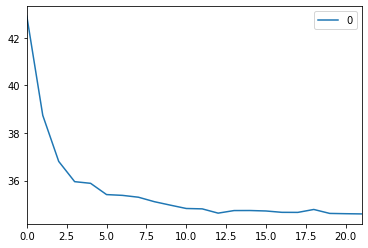

In [15]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()


In [16]:
n = []
for i in range(2,101):
    n.append(i)
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':n}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 18}

In [19]:
#predicting on the test set and creating submission file
test = np.expand_dims(X_train_scaled[0], axis=0)
inversedX = scaler_model.inverse_transform(test)
inversedy = scaler_model.inverse_transform(y_train_scaled[0])


In [20]:
print(f"Predicted price: {model.predict(inversedX)}")
print(f"Actual price: {inversedy}")

Predicted price: [[31.333334]]
Actual price: [24.]
